# Librerias

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns # graficos con dataframes
import matplotlib.pyplot as plt # crear graficos

#obtener las palabras clave
import nltk 
from nltk.corpus import stopwords
import wordcloud
from wordcloud import WordCloud, STOPWORDS

#crear una bolsa de palabras clave utilizar “count vectorize” de la librería Scikit-learn
# pip install scikit-learn
from sklearn.feature_extraction.text import CountVectorizer

#importar el modelo de regresión logistica
from sklearn.linear_model import LogisticRegression

#matriz de confusión
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Lectura de datos

In [2]:
#leer los datos del fichero de titulos
misdatos = pd.read_csv('../dataset/flipkart_product.csv', encoding="unicode_escape")
misdatos.shape

(189874, 5)

In [3]:
misdatos.columns

Index(['ProductName', 'Price', 'Rate', 'Review', 'Summary'], dtype='object')

In [4]:
misdatos.head()

,ProductName,Price,Rate,Review,Summary
0,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Super!,Great cooler.. excellent air flow and for this...
1,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Awesome,Best budget 2 fit cooler. Nice cooling
2,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,Fair,The quality is good but the power of air is de...
3,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",1,Useless product,Very bad product it's a only a fan
4,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,Fair,Ok ok product


# Limpieza y transformación de datos

In [5]:
data = misdatos.copy()
data.shape

(189874, 5)

In [6]:
data.columns

Index(['ProductName', 'Price', 'Rate', 'Review', 'Summary'], dtype='object')

In [7]:
# renombrar las columnas del dataframe
data.rename(columns = {'ProductName':'producto', 
                       'Price':'precio_producto', 
                       'Rate':'calificacion', 
                       'Review':'revision', 
                       'Summary':'descripcion'                                                                
                      }, inplace = True)
data.columns

Index(['producto', 'precio_producto', 'calificacion', 'revision',
       'descripcion'],
      dtype='object')

In [8]:
#valores nulos
data.isnull().sum()

producto            0
precio_producto     1
calificacion        1
revision            4
descripcion        14
dtype: int64

## elimina caracteres extraños

In [9]:
#remove character with undefined name
import re
def rmv_char(text):
  text = str(text)
  text = re.sub('[^a-zA-Z0-9(/)]',' ', text)
  text = re.sub('\s+',' ', text) #remove whitespace
  return text

In [10]:
data['descripcion'] = data['descripcion'].apply(lambda x: rmv_char(x).lower())
data['revision'] = data['revision'].apply(lambda x: rmv_char(x).lower())
data['producto']= data['producto'].apply(lambda x:rmv_char(x))

## producto

In [11]:
print(data['producto'].value_counts())

MILTON Thermosteel Flip Lid 500 ml Flask (Pack of 1 Silver Steel)                                                     9278
cello Pack of 18 Opalware Cello Dazzle Lush Fiesta Opalware Dinner Set 18 Pieces Dinner Set (White Microwave Safe)    8870
Home Sizzler 153 cm (5 02 ft) Polyester Room Darkening Window Curtain (Pack Of 2) (Floral Brown)                      4350
CMerchants Multi Organiser BLue 4 Book Shelf Metal Open Book Shelf (Finish Color BLUE DIY(Do It Yourself))            2399
Kadio Analog 20 cm X 20 cm Wall Clock (Beige With Glass Standard)                                                     2380
                                                                                                                      ... 
38024PP25 Minimalists Analog Watch For Men                                                                               9
LS2727 Avatar Day and Date Functioning Crocodile Strap Analog Analog Watch For Men                                       8
Stylish Brown Sp

## precio

In [12]:
#identificar valores nulos
data['precio_producto'].isnull().sum()

1

In [13]:
#sustituir valores nulos por el valor '10'
data["precio_producto"].fillna("10", inplace = True)
#identificar valores nulos
data['precio_producto'].isnull().sum()

0

In [14]:
print(data['precio_producto'].value_counts())

â¹1,299                                                       10005
â¹648                                                          9278
â¹299                                                          6697
â¹339                                                          2542
â¹13,999                                                       2518
                                                               ...  
â¹404                                                             5
Nova Plus Amaze NI 10 1100 W Dry Iron?ÿ?ÿ(Grey & Turquoise)        1
Bajaj DX 2 L/W Dry Iron                                            1
Pigeon Favourite Electric Kettle?ÿ?ÿ(1.5 L, Silver, Black)         1
10                                                                 1
Name: precio_producto, Length: 562, dtype: int64


In [15]:
# extraer las primeras 3 posiciones del "precio" ya que son caracteres extraños
for i in range(len(data)):
    data.loc[i, 'precio'] = data.iloc[i].precio_producto[3:]
#eliminar la columna
del(data['precio_producto'])
data.head()

,producto,calificacion,revision,descripcion,precio
0,Candes 12 L Room/Personal Air Cooler (White Bl...,5,super,great cooler excellent air flow and for this p...,"3,999"
1,Candes 12 L Room/Personal Air Cooler (White Bl...,5,awesome,best budget 2 fit cooler nice cooling,"3,999"
2,Candes 12 L Room/Personal Air Cooler (White Bl...,3,fair,the quality is good but the power of air is de...,"3,999"
3,Candes 12 L Room/Personal Air Cooler (White Bl...,1,useless product,very bad product it s a only a fan,"3,999"
4,Candes 12 L Room/Personal Air Cooler (White Bl...,3,fair,ok ok product,"3,999"


In [16]:
print(data['precio'].value_counts())

1,299                                                       10175
648                                                          9278
299                                                          8335
1,599                                                        3499
13,999                                                       2828
                                                            ...  
488                                                            10
aj DX 2 L/W Dry Iron                                            1
a Plus Amaze NI 10 1100 W Dry Iron?ÿ?ÿ(Grey & Turquoise)        1
eon Favourite Electric Kettle?ÿ?ÿ(1.5 L, Silver, Black)         1
                                                                1
Name: precio, Length: 477, dtype: int64


In [17]:
#reemplazar los valores
data['precio'] = data['precio'].replace({'aj DX 2 L/W Dry Iron': 10})
data['precio'] = data['precio'].replace({'a Plus Amaze NI 10 1100 W Dry Iron?ÿ?ÿ(Grey & Turquoise)': 10})
data['precio'] = data['precio'].replace({'eon Favourite Electric Kettle?ÿ?ÿ(1.5 L, Silver, Black)': 10})

print(data['precio'].value_counts())

1,299     10175
648        9278
299        8335
1,599      3499
13,999     2828
          ...  
2,345        10
645          10
6,387        10
10            3
              1
Name: precio, Length: 475, dtype: int64


## calificacion

In [18]:
print(data['calificacion'].value_counts())

5                                                              108694
4                                                               39653
1                                                               19607
3                                                               15681
2                                                                6234
Pigeon Favourite Electric Kettle?ÿ?ÿ(1.5 L, Silver, Black)          1
Bajaj DX 2 L/W Dry Iron                                             1
Nova Plus Amaze NI 10 1100 W Dry Iron?ÿ?ÿ(Grey & Turquoise)         1
s                                                                   1
Name: calificacion, dtype: int64


In [19]:
#identificar valores nulos
data['calificacion'].isnull().sum()

1

In [20]:
#sustituir valores nulos por el valor '10'
data["calificacion"].fillna("1", inplace = True)
#identificar valores nulos
data['calificacion'].isnull().sum()

0

In [21]:
#reemplazar los valores
data['calificacion'] = data['calificacion'].replace({'Pigeon Favourite Electric Kettle?ÿ?ÿ(1.5 L, Silver, Black)': 1})
data['calificacion'] = data['calificacion'].replace({'Bajaj DX 2 L/W Dry Iron': 1})
data['calificacion'] = data['calificacion'].replace({'Nova Plus Amaze NI 10 1100 W Dry Iron?ÿ?ÿ(Grey & Turquoise)': 1})
data['calificacion'] = data['calificacion'].replace({'Bajaj DX 2 L/W Dry Iron': 1})
data['calificacion'] = data['calificacion'].replace({'s': 1})

print(data['calificacion'].value_counts())

5    108694
4     39653
1     19608
3     15681
2      6234
1         4
Name: calificacion, dtype: int64


## revision

In [22]:
print(data['revision'].value_counts())

nan                                    20866
wonderful                               8918
awesome                                 5510
worth every penny                       5464
classy product                          5438
                                       ...  
great product with this price range        1
best juicer                                1
fast delivery                              1
avg product                                1
well                                       1
Name: revision, Length: 1180, dtype: int64


In [23]:
data['revision'] = data['revision'].replace({'nan': 'others'})
print(data['revision'].value_counts())

others                                 20866
wonderful                               8918
awesome                                 5510
worth every penny                       5464
classy product                          5438
                                       ...  
great product with this price range        1
best juicer                                1
fast delivery                              1
avg product                                1
well                                       1
Name: revision, Length: 1180, dtype: int64


## descripcion

In [24]:
print(data['descripcion'].value_counts())

good                                                                        15205
nice                                                                         8384
good product                                                                 5828
nice product                                                                 4185
super                                                                        2802
                                                                            ...  
it s a beautiful watch i just love it                                           1
okh                                                                             1
looks good but too small                                                        1
good good good prodect                                                          1
it s a nice product thanks very much to flipcart for the speedy service         1
Name: descripcion, Length: 88857, dtype: int64


# calificacion - exploracion

In [25]:
# var_num = []
# for c in data.columns:
#     t = str(data[c].dtype)
#     if "int64" in t or "float64" in t:
#         var_num.append(c)
# pd.DataFrame(var_num)

In [26]:
var_cual = []
for c in data.columns:
    t = str(data[c].dtype)
    if "object" in t:
        var_cual.append(c)
pd.DataFrame(var_cual)

,0
0,producto
1,calificacion
2,revision
3,descripcion
4,precio


In [27]:
var_cual.remove('producto')
var_cual.remove('revision')
var_cual.remove('descripcion')
var_cual.remove('precio')
var_cual

['calificacion']

*************************************************
Variable = calificacion
*************************************************
   Frecuencias Relativas  Frecuencias Absolutas
5               0.572453                 108694
4               0.208838                  39653
1               0.103268                  19608
3               0.082586                  15681
2               0.032832                   6234
1               0.000021                      4


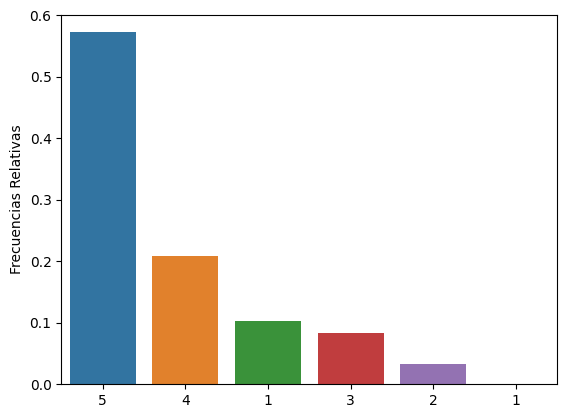

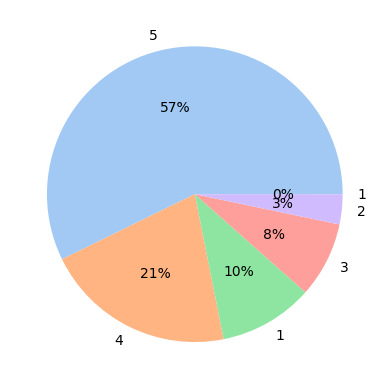

*************************************************
*************************************************


In [28]:
# gráficos y tablas de frecuencias de todas las variables cualitativas:
for i in var_cual:
    
    print("*************************************************")
    print("Variable = "+i)
    print("*************************************************")
    
    # 1. La tabla de frecuencias de la variable i
    pct = pd.DataFrame(data[i].value_counts(normalize=True))
    pct.columns = ['Frecuencias Relativas']
    pct["Frecuencias Absolutas"] = data[i].value_counts()
    print(pct)
    
    # 2. Barplot de la variable i
    sns.barplot(x=pct.index, y='Frecuencias Relativas', data=pct)
    plt.show()
    
    # 3. Pieplot de la variable i
    frec_abs = data[i].value_counts() # grabo las frecuencias absolutas
    labels = data[i].value_counts().index # cojo los nombres de los grupos de variable cualitativa i 
    colors = sns.color_palette('pastel')[0:len(labels)] # defino los colors según la paleta pastel de seaborn
    plt.pie(frec_abs, labels = labels, colors = colors, autopct='%.0f%%') # pie plot y muestro los porcentajes
    plt.show()
    
    print("*************************************************")
    print("*************************************************")

# Palabras clave

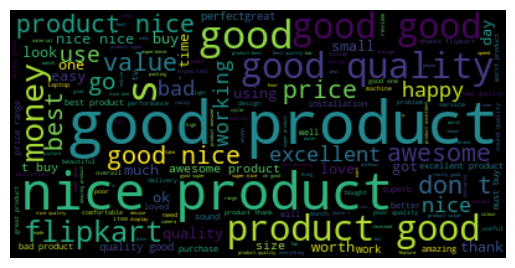

In [29]:
#Creamos la lista de palabras
stopwords = set(STOPWORDS)
stopwords.update(["br", "href"])
text = " ".join(review for review in data.descripcion)
wordcloud = WordCloud(stopwords=stopwords).generate(text)

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

# Clasificar los comentarios

In [30]:
#convertir a numerico
data['calificacion'] = data['calificacion'].astype('int64')

In [31]:
print(data['calificacion'].value_counts())

5    108694
4     39653
1     19612
3     15681
2      6234
Name: calificacion, dtype: int64


In [51]:
#establecer el parametro para calificar los comentarios
calificacion_comentarios = 1
calificacion_comentarios

1

In [52]:
# clasificar lso comentarios positivos y negativos, a partir de la variable "calificacion_comentarios"
for i in range(len(data)):
    if data.iloc[i]['calificacion'] > calificacion_comentarios:
        data.loc[i, 'sentimiento'] = '1'
    else:
        data.loc[i, 'sentimiento'] = '0'

print(data['sentimiento'].value_counts())

# Palabras clave "positivas" y "negativas"

In [33]:
# partimos el df en positivo y negativo
positivo = data[data['sentimiento'] == '1']
negativo = data[data['sentimiento'] == '0']

## positivas

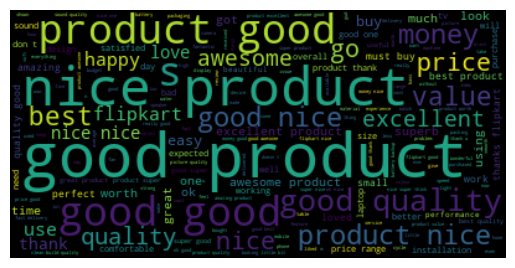

In [34]:
#Creamos la lista de palabras positivas
stopwords = set(STOPWORDS)
stopwords.update(["br", "href"])
txt_positivo = " ".join(review for review in positivo.descripcion)
wordcloud_positivo = WordCloud(stopwords=stopwords).generate(txt_positivo)

plt.imshow(wordcloud_positivo, interpolation = 'bilinear')
plt.axis("off")
plt.show()

## negativas

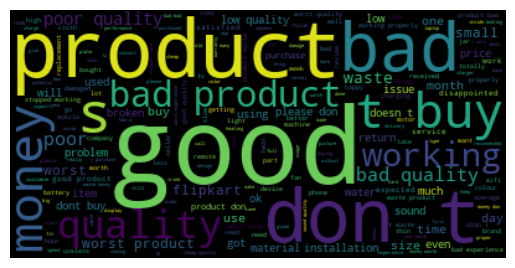

In [35]:
#Creamos la lista de palabras negativas
# stopwords = set(STOPWORDS)
# stopwords.update(["br", "href"])
txt_negativo = " ".join(review for review in negativo.descripcion)
wordcloud_negativo = WordCloud(stopwords=stopwords).generate(txt_negativo)

plt.imshow(wordcloud_negativo, interpolation = 'bilinear')
plt.axis("off")
plt.show()

# sentimiento - exploración

In [36]:
var_cual = []
for c in data.columns:
    t = str(data[c].dtype)
    if "object" in t:
        var_cual.append(c)
pd.DataFrame(var_cual)

,0
0,producto
1,revision
2,descripcion
3,precio
4,sentimiento


In [37]:
var_cual.remove('producto')
var_cual.remove('revision')
var_cual.remove('descripcion')
var_cual.remove('precio')
var_cual

['sentimiento']

*************************************************
Variable = sentimiento
*************************************************
   Frecuencias Relativas  Frecuencias Absolutas
1               0.863878                 164028
0               0.136122                  25846


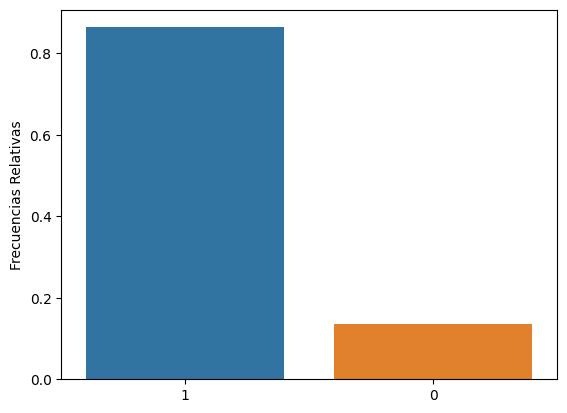

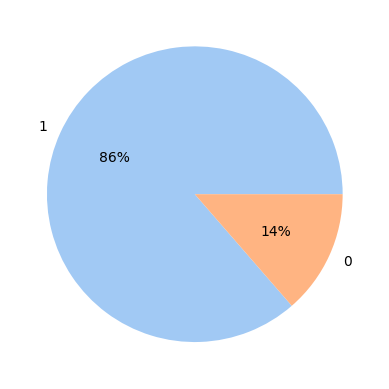

*************************************************
*************************************************


In [38]:
# gráficos y tablas de frecuencias de todas las variables cualitativas:
for i in var_cual:
    
    print("*************************************************")
    print("Variable = "+i)
    print("*************************************************")
    
    # 1. La tabla de frecuencias de la variable i
    pct = pd.DataFrame(data[i].value_counts(normalize=True))
    pct.columns = ['Frecuencias Relativas']
    pct["Frecuencias Absolutas"] = data[i].value_counts()
    print(pct)
    
    # 2. Barplot de la variable i
    sns.barplot(x=pct.index, y='Frecuencias Relativas', data=pct)
    plt.show()
    
    # 3. Pieplot de la variable i
    frec_abs = data[i].value_counts() # grabo las frecuencias absolutas
    labels = data[i].value_counts().index # cojo los nombres de los grupos de variable cualitativa i 
    colors = sns.color_palette('pastel')[0:len(labels)] # defino los colors según la paleta pastel de seaborn
    plt.pie(frec_abs, labels = labels, colors = colors, autopct='%.0f%%') # pie plot y muestro los porcentajes
    plt.show()
    
    print("*************************************************")
    print("*************************************************")

# Construir un modelo

Construir un modelo de analisis de sentimiento, en función de la reseña del producto. 

In [39]:
#crear un df nuevo con las columnas descripción y sentimiento
df_modelo = data[['descripcion','sentimiento']]
df_modelo.shape 

(189874, 2)

In [102]:
df_modelo.head()

,descripcion,sentimiento
0,great cooler excellent air flow and for this p...,1
1,best budget 2 fit cooler nice cooling,1
2,the quality is good but the power of air is de...,1
3,very bad product it s a only a fan,0
4,ok ok product,1


## datos de entrenamiento y test

In [40]:
#dividr los datos en datos de entrenamiento y datos de test
index = df_modelo.index
df_modelo['random'] = np.random.randn(len(index))
train = df_modelo[df_modelo['random'] <= 0.8]
test = df_modelo[df_modelo['random'] > 0.8]
print('Los datos de entrenamiento son:', len(train))
print('Los datos de validación son:', len(test))

Los datos de entrenamiento son: 149816
Los datos de validación son: 40058


C:\Users\Admin\AppData\Local\Temp\ipykernel_9884\1120368498.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_modelo['random'] = np.random.randn(len(index))


## crear una bolsa de palabras clave

In [41]:
# from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train_matrix = vectorizer.fit_transform(train['descripcion'])
test_matrix = vectorizer.transform(test['descripcion'])

## importar el modelo de regresión logistica

In [42]:
# from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

# dividir la variable de entrada y de salida

In [43]:
X_train = train_matrix
X_test = test_matrix
y_train = train['sentimiento']
y_test = test['sentimiento']

## ajustar el modelo

In [44]:
lr.fit(X_train,y_train)

c:\Users\Admin\Documents\GitHub_Publicos\comentarios_ecommerce\desa_comentarios\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## realizar las predicciones

In [45]:
predictions = lr.predict(X_test)
predictions

array(['1', '1', '1', ..., '1', '1', '1'], dtype=object)

## pruebas con datos de TEST

La matriz de confusión: 
[[ 4213   890]
 [ 1229 33726]]


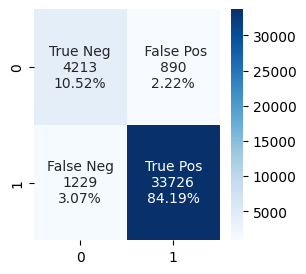

Las metricas principales: 
              precision    recall  f1-score   support

           0       0.77      0.83      0.80      5103
           1       0.97      0.96      0.97     34955

    accuracy                           0.95     40058
   macro avg       0.87      0.90      0.88     40058
weighted avg       0.95      0.95      0.95     40058



In [49]:
# from sklearn.metrics import confusion_matrix
print("La matriz de confusión: ")
confusion_matrix(predictions,y_test)
cf_matrix = confusion_matrix(predictions,y_test)
print(cf_matrix)
    #plt.title('Confusion Matrix')
    #sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Blues')
    # definir los valores para mostrar la matriz de confusión
plt.figure(figsize=(3, 3))    
group_names = ['True Neg', ' False Pos', 'False Neg', 'True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
plt.show()
print("Las metricas principales: ")
# from sklearn.metrics import classification_report
print(classification_report(predictions, y_test))

La precisión del modelo con los datos de "test" es del 95%.